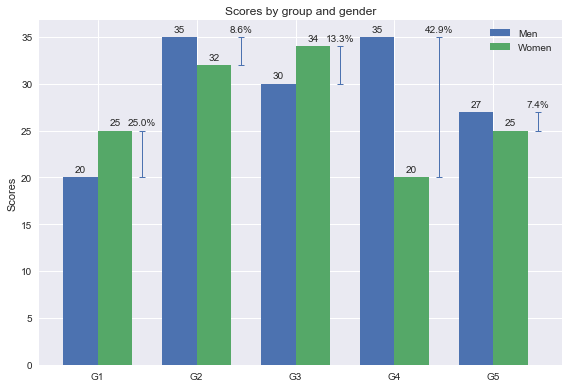

In [1]:
# Grouped bar chart with precentage change bars and labels
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')


men_means = np.array([20, 35, 30, 35, 27])
women_means = np.array([25, 32, 34, 20, 25])

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind - width/2, men_means, width, 
                label='Men')
rects2 = ax.bar(ind + width/2, women_means, width,
                label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.

    ha: horizontal alignment
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)

# custom error bar 
diff = (men_means - women_means)/2
change_percentage = np.abs((men_means - women_means)/men_means)
errorbar_y = men_means - diff # the y of the error bar
errorbar_x_offset = 0.1


# show the small caps on error bar ends:
# capsize=3 (bar width) AND markeredgewidth=1 (bar width - default is 0)
# elinewidth=1 is the error bar line width
ax.errorbar(ind + width + errorbar_x_offset, errorbar_y,
            yerr=diff, fmt='none', elinewidth=1, 
            capsize=3, markeredgewidth=1)

# show the change percentage labels

errorbar_text_offset = 0.625 # the offset fro the man's bar x location

for i in range(len(rects1)):
    # find the higher bar to determine label height
    height1 = rects1[i].get_height() 
    height2 = rects2[i].get_height()
    height = height1 if height1 > height2 else height2
    
    # add the percentage change labels
    ax.annotate(f'{change_percentage[i]:.1%}', # the text 
                xy=(ind[i] - width/2 + 0.625, height), # x y for the text
                xytext=(0, 3),   # 0 point horizotal and 3 points vertical offsets
                textcoords="offset points",  # in both directions
                ha='center',  # horizontal alignment
                va='bottom') # vertical alignment

fig.tight_layout()

plt.show()

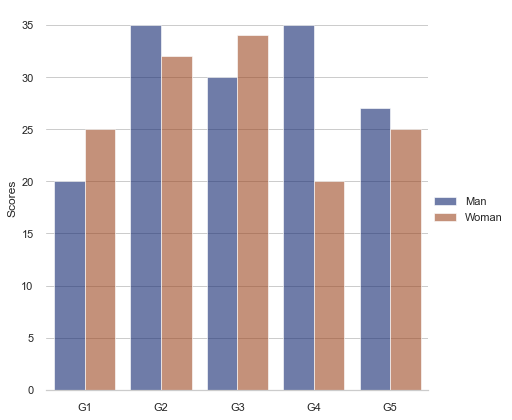

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme(style="whitegrid")

men_means = np.array([20, 35, 30, 35, 27])
women_means = np.array([25, 32, 34, 20, 25])
groups = np.array(['G1', 'G2', 'G3', 'G4', 'G5'])
man = np.full(5, 'Man')
woman = np.full(5, 'Woman')

data_man = np.stack((men_means, groups, man), axis=-1)
data_woman = np.stack((women_means, groups, woman), axis=-1)
data = np.concatenate((data_man, data_woman), axis=0)

data_df = pd.DataFrame(data, columns=['mean', 'group', 'sex'])
data_df['mean'] = pd.to_numeric(data_df['mean'])

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data_df, kind="bar",
    x="group", y="mean", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Scores")
g.legend.set_title("")

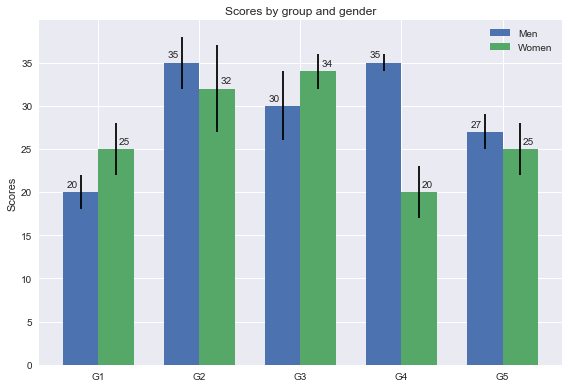

In [2]:
# original example from https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')


men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()

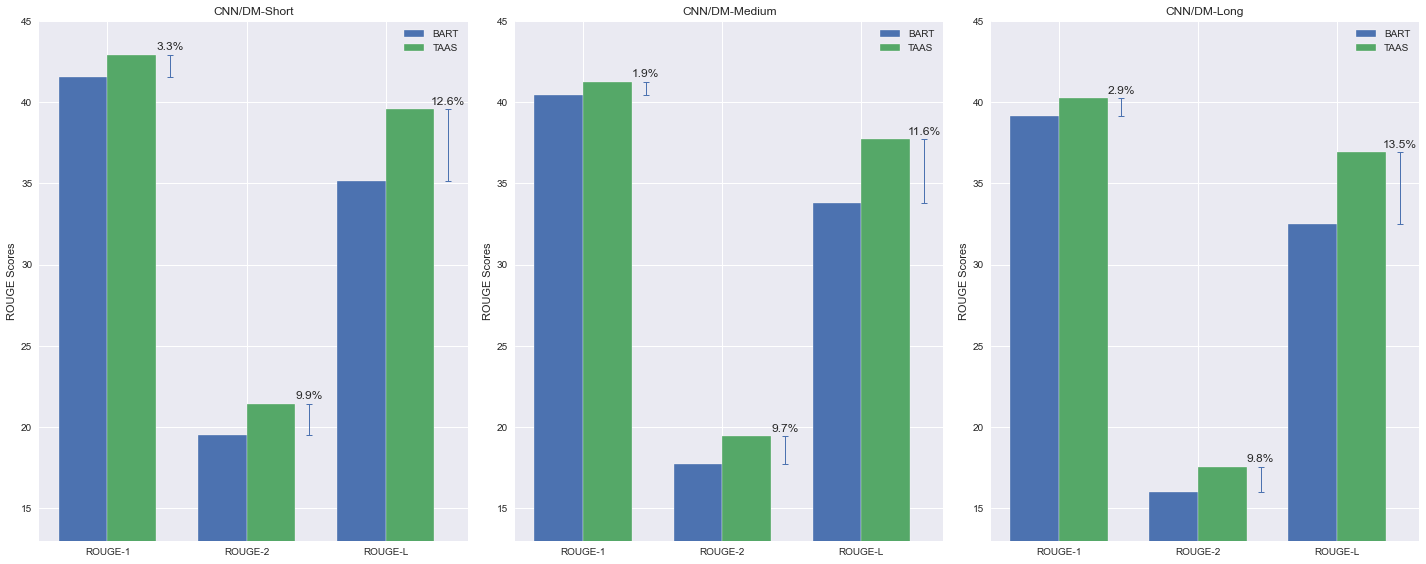

In [19]:
# Grouped bar chart with precentage change bars and labels
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

bart_short = np.array([41.51, 19.5, 35.12])
taas_short = np.array([42.9, 21.43, 39.56])
bart_medium = np.array([40.46, 17.7, 33.79])
taas_medium = np.array([41.23, 19.42, 37.7])
bart_long = np.array([39.12, 15.99, 32.52])
taas_long = np.array([40.24, 17.56, 36.9])
change_s = np.abs((bart_short - taas_short)/bart_short)
change_m = np.abs((bart_medium - taas_medium)/bart_medium)
change_l = np.abs((bart_long - taas_long)/bart_long)
xtick_labels = ('ROUGE-1', 'ROUGE-2', 'ROUGE-L')

ind = np.arange(len(bart_short))  # the x locations for the groups
width = 0.35  # the width of the bars

def groupbarplot(ax, x1, x2, label1, label2, y_label, xtick_labels, title):
    """
    Given two array, plot a grouped bar plot
    """


    rects1 = ax.bar(ind - width/2, x1, width, 
                    label=label1)
    rects2 = ax.bar(ind + width/2, x2, width,
                    label=label2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_ylim(13, 45)
    ax.set_title(title)
    ax.set_xticks(ind)
    ax.set_xticklabels(xtick_labels)
    ax.legend()
    return rects1, rects2

fig, ax = plt.subplots(1, 3, figsize=(20, 8))

rects1_s, rects2_s = groupbarplot(ax[0], bart_short, taas_short, 'BART', 'TAAS', 'ROUGE Scores', xtick_labels, 'CNN/DM-Short')
rects1_m, rects2_m = groupbarplot(ax[1], bart_medium, taas_medium, 'BART', 'TAAS', 'ROUGE Scores', xtick_labels, 'CNN/DM-Medium')
rects1_l, rects2_l = groupbarplot(ax[2], bart_long, taas_long, 'BART', 'TAAS', 'ROUGE Scores', xtick_labels, 'CNN/DM-Long')

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.

    ha: horizontal alignment
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

#autolabel(rects1)
#autolabel(rects2)

def autobar(ax, x1, x2):
    """
    Attach a errorbar to show difference 
    Add text label above each error bar to show percentage
    """

    # custom error bar 
    diff = (x1 - x2)/2
    
    errorbar_y = x1 - diff # the y of the error bar
    errorbar_x_offset = 0.1


    # show the small caps on error bar ends:
    # capsize=3 (bar width) AND markeredgewidth=1 (bar width - default is 0)
    # elinewidth=1 is the error bar line width
    ax.errorbar(ind + width + errorbar_x_offset, errorbar_y,
                yerr=diff, fmt='none', elinewidth=1, 
                capsize=3, markeredgewidth=1)

autobar(ax[0], bart_short, taas_short)
autobar(ax[1], bart_medium, taas_medium)
autobar(ax[2], bart_long, taas_long)

def autobarlable(ax, rects1, rects2, change_percentage):
    """
    Attach a errorbar to show difference 
    Add text label above each error bar to show percentage
    """
    errorbar_text_offset = 0.625 # the offset fro the man's bar x location

    for i in range(len(rects1)):
        # find the higher bar to determine label height
        height1 = rects1[i].get_height() 
        height2 = rects2[i].get_height()
        height = height1 if height1 > height2 else height2
        
        # add the percentage change labels
        ax.annotate(f'{change_percentage[i]:.1%}', # the text 
                    xy=(ind[i] - width/2 + 0.625, height), # x y for the text
                    xytext=(0, 3),   # 0 point horizotal and 3 points vertical offsets
                    textcoords="offset points",  # in both directions
                    ha='center',  # horizontal alignment
                    va='bottom') # vertical alignment

autobarlable(ax[0], rects1_s, rects2_s, change_s)
autobarlable(ax[1], rects1_m, rects2_m, change_m)
autobarlable(ax[2], rects1_l, rects2_l, change_l)

fig.tight_layout()

plt.show()

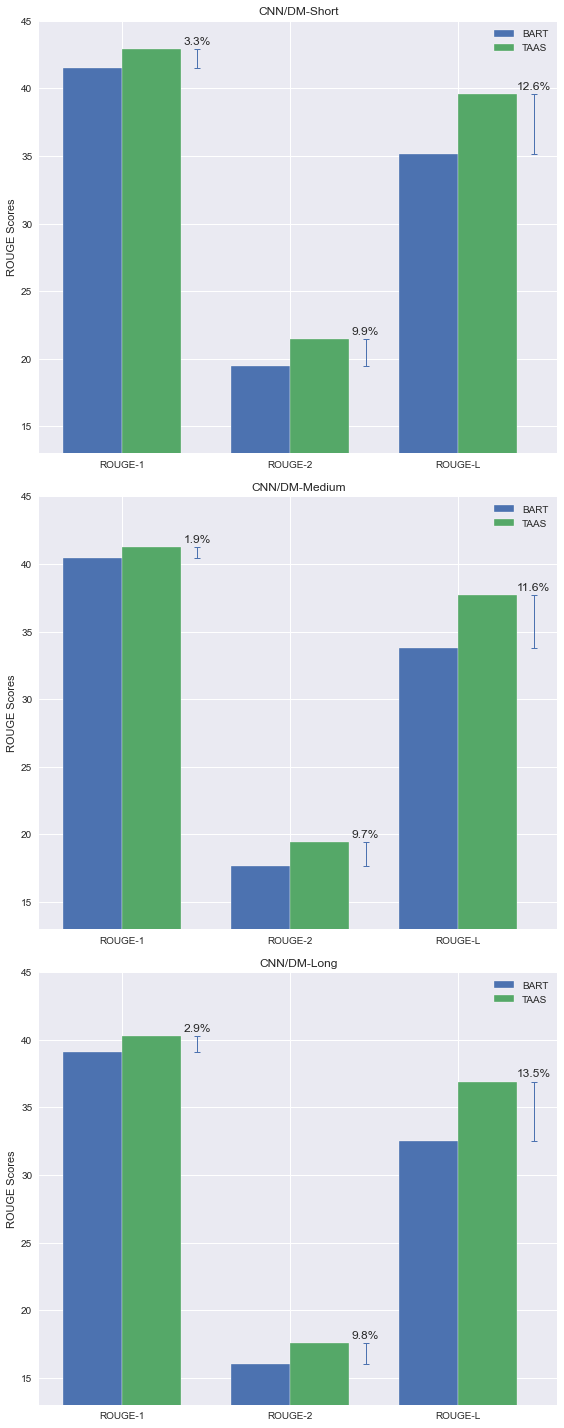

In [15]:
# Grouped bar chart with precentage change bars and labels
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

bart_short = np.array([41.51, 19.5, 35.12])
taas_short = np.array([42.9, 21.43, 39.56])
bart_medium = np.array([40.46, 17.7, 33.79])
taas_medium = np.array([41.23, 19.42, 37.7])
bart_long = np.array([39.12, 15.99, 32.52])
taas_long = np.array([40.24, 17.56, 36.9])
change_s = np.abs((bart_short - taas_short)/bart_short)
change_m = np.abs((bart_medium - taas_medium)/bart_medium)
change_l = np.abs((bart_long - taas_long)/bart_long)
xtick_labels = ('ROUGE-1', 'ROUGE-2', 'ROUGE-L')

ind = np.arange(len(bart_short))  # the x locations for the groups
width = 0.35  # the width of the bars

def groupbarplot(ax, x1, x2, label1, label2, y_label, xtick_labels, title):
    """
    Given two array, plot a grouped bar plot
    """


    rects1 = ax.bar(ind - width/2, x1, width, 
                    label=label1)
    rects2 = ax.bar(ind + width/2, x2, width,
                    label=label2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_ylim(13, 45)
    ax.set_title(title)
    ax.set_xticks(ind)
    ax.set_xticklabels(xtick_labels)
    ax.legend()
    return rects1, rects2

fig, ax = plt.subplots(3, 1, figsize=(8, 20))

rects1_s, rects2_s = groupbarplot(ax[0], bart_short, taas_short, 'BART', 'TAAS', 'ROUGE Scores', xtick_labels, 'CNN/DM-Short')
rects1_m, rects2_m = groupbarplot(ax[1], bart_medium, taas_medium, 'BART', 'TAAS', 'ROUGE Scores', xtick_labels, 'CNN/DM-Medium')
rects1_l, rects2_l = groupbarplot(ax[2], bart_long, taas_long, 'BART', 'TAAS', 'ROUGE Scores', xtick_labels, 'CNN/DM-Long')

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.

    ha: horizontal alignment
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

#autolabel(rects1)
#autolabel(rects2)

def autobar(ax, x1, x2):
    """
    Attach a errorbar to show difference 
    Add text label above each error bar to show percentage
    """

    # custom error bar 
    diff = (x1 - x2)/2
    
    errorbar_y = x1 - diff # the y of the error bar
    errorbar_x_offset = 0.1


    # show the small caps on error bar ends:
    # capsize=3 (bar width) AND markeredgewidth=1 (bar width - default is 0)
    # elinewidth=1 is the error bar line width
    ax.errorbar(ind + width + errorbar_x_offset, errorbar_y,
                yerr=diff, fmt='none', elinewidth=1, 
                capsize=3, markeredgewidth=1)

autobar(ax[0], bart_short, taas_short)
autobar(ax[1], bart_medium, taas_medium)
autobar(ax[2], bart_long, taas_long)

def autobarlable(ax, rects1, rects2, change_percentage):
    """
    Attach a errorbar to show difference 
    Add text label above each error bar to show percentage
    """
    errorbar_text_offset = 0.625 # the offset fro the man's bar x location

    for i in range(len(rects1)):
        # find the higher bar to determine label height
        height1 = rects1[i].get_height() 
        height2 = rects2[i].get_height()
        height = height1 if height1 > height2 else height2
        
        # add the percentage change labels
        ax.annotate(f'{change_percentage[i]:.1%}', # the text 
                    xy=(ind[i] - width/2 + 0.625, height), # x y for the text
                    xytext=(0, 3),   # 0 point horizotal and 3 points vertical offsets
                    textcoords="offset points",  # in both directions
                    ha='center',  # horizontal alignment
                    va='bottom') # vertical alignment

autobarlable(ax[0], rects1_s, rects2_s, change_s)
autobarlable(ax[1], rects1_m, rects2_m, change_m)
autobarlable(ax[2], rects1_l, rects2_l, change_l)

fig.tight_layout()

plt.show()